In [ ]:
import pandas
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
static_path = '/gdrive/MyDrive/Data Engineer/Coderhouse/Semana 1/Ejercicios/databases'
agents = pandas.read_csv(f'{static_path}/agents.csv')
customers = pandas.read_csv(f'{static_path}/customers.csv')
calls = pandas.read_csv(f'{static_path}/calls.csv')

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [ ]:
def create_database(agents, customers, calls):
  global database
  database = create_engine('sqlite:///:memory:')
  agents.to_sql('agents', database, index=False)
  customers.to_sql('customers', database, index=False)
  calls.to_sql('calls', database, index=False)

create_database(agents, customers, calls)

In [ ]:
inspect(database).get_table_names()

['agents', 'calls', 'customers']

In [ ]:
def execute_query(query):
  return pandas.read_sql(sql=query, con=database.connect())

# M

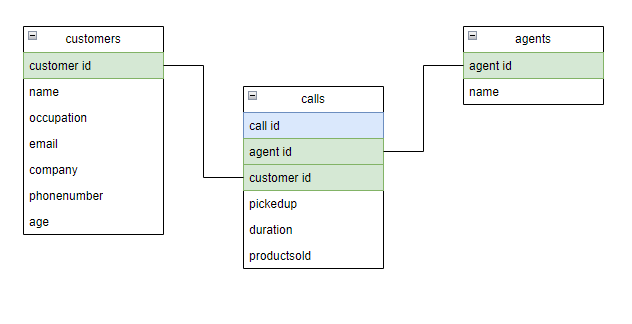

# Exercise 1

From agents table, extract from agents all rows where the name start with M or finish with O

In [ ]:
execute_query("""
SELECT *
FROM agents
WHERE name like 'M%'
OR name like '%O';
""")

,agentid,name
0,0,Michele Williams
1,2,Christopher Moreno


# Excercise 2
From customers table, get all customer where occupation has engineer word in its value and then order the result by alphabet.

In [ ]:
execute_query("""
SELECT DISTINCT occupation
FROM customers
WHERE occupation LIKE '%engineer%'
ORDER BY occupation;
""")

,occupation
0,Chemical engineer
1,Electrical engineer
2,"Engineer, aeronautical"
3,"Engineer, agricultural"
4,"Engineer, automotive"
5,"Engineer, biomedical"
6,"Engineer, broadcasting (operations)"
7,"Engineer, building services"
8,"Engineer, civil (consulting)"
9,"Engineer, civil (contracting)"


# Execise 3

From customers, write a query that return customerID, name and a new column called 'Mayor30' with 'Si' or 'No' if the customer age > 30 or not.

In [ ]:
execute_query('''
SELECT
  customerid,
  name,
  age,
  (CASE WHEN age > 30 THEN 'Si' ELSE 'No' END) as Mayor30
FROM customers;
''')

,customerid,name,Age,Mayor30
0,0,David Melton,16,No
1,1,Michael Gonzalez,19,No
2,2,Amanda Wilson,18,No
3,3,Robert Thomas,25,No
4,4,Eddie Hall,30,No
...,...,...,...,...
995,995,Ashley Young,19,No
996,996,Mr. Steven Smith,26,No
997,997,Mark Smith,29,No
998,998,Jeffrey Carrillo,15,No


# Exercise 4

Write a query that return all calls made to engineer customers <br>
and show if their age are upper 30 or lower and if they buyed a product in that call.

In [ ]:
execute_query('''
SELECT
  callid,
  calls.customerid,
  name,
  occupation,
  (CASE WHEN customers.age > 30 THEN 'Si' ELSE 'No' END) as Mayor30,
  (CASE WHEN calls.productsold = 0 THEN 'Si' ELSE 'No' END) as Compro
FROM calls
INNER JOIN customers ON calls.customerid = customers.customerid
WHERE occupation like '%engineer%';
''')

,callid,customerid,name,occupation,Mayor30,Compro
0,1592,3,Robert Thomas,"Engineer, structural",No,Si
1,2160,3,Robert Thomas,"Engineer, structural",No,Si
2,3170,3,Robert Thomas,"Engineer, structural",No,Si
3,3495,3,Robert Thomas,"Engineer, structural",No,Si
4,3750,3,Robert Thomas,"Engineer, structural",No,Si
...,...,...,...,...,...,...
3614,6520,997,Mark Smith,"Engineer, control and instrumentation",No,No
3615,7025,997,Mark Smith,"Engineer, control and instrumentation",No,No
3616,7342,997,Mark Smith,"Engineer, control and instrumentation",No,Si
3617,7536,997,Mark Smith,"Engineer, control and instrumentation",No,Si


# Exercise 5

a) For engineers customers, get the summary of all sales and calls made. <br>
b) Calculate the a) metrics but for all clients.

In [ ]:
# a)
execute_query('''
SELECT
  customers.customerid,
  name,
  occupation,
  COUNT(*) as total_calls,
  SUM(productsold) as total_sells
FROM customers INNER JOIN calls ON customers.customerid = calls.customerid
WHERE occupation like '%engineer%'
GROUP BY calls.customerid;
''')

,customerid,name,occupation,total_calls,total_sells
0,3,Robert Thomas,"Engineer, structural",11,1
1,6,Maria Johnson,"Engineer, aeronautical",11,2
2,11,Brandon Alexander,Chemical engineer,9,2
3,14,Michelle Reyes,"Engineer, drilling",11,5
4,22,Sean Martinez,"Engineer, manufacturing systems",5,0
...,...,...,...,...,...
356,990,Thomas Hill,Chemical engineer,11,2
357,991,Allen Robertson,Chemical engineer,7,1
358,993,Susan Murray,"Engineer, energy",14,2
359,996,Mr. Steven Smith,"Engineer, structural",14,4


In [ ]:
#b)
execute_query('''
SELECT
  customers.customerid,
  name,
  occupation,
  SUM(pickedup) as total_calls,
  SUM(productsold) as total_sells
FROM customers INNER JOIN calls ON customers.customerid = calls.customerid
GROUP BY calls.customerid;
''')

,customerid,name,occupation,total_calls,total_sells
0,0,David Melton,Unemployed,6,2
1,1,Michael Gonzalez,Student,6,3
2,2,Amanda Wilson,Student,9,3
3,3,Robert Thomas,"Engineer, structural",6,1
4,4,Eddie Hall,Surgeon,5,1
...,...,...,...,...,...
995,995,Ashley Young,Student,6,1
996,996,Mr. Steven Smith,"Engineer, structural",9,4
997,997,Mark Smith,"Engineer, control and instrumentation",8,3
998,998,Jeffrey Carrillo,Unemployed,6,2


# Exercise 6

For each agent get:
- name
- Total calls made
- Largest call
- shortest call
- mean call duration
- total products sold







In [ ]:
execute_query('''
SELECT
  name as AgentName,
  COUNT(*) as NCalls,
  ROUND(AVG(duration),2) as AvgDuration,
  MAX(duration) as Longest,
  MIN(duration) as Shortest,
  SUM(productsold) as TotalSales
FROM agents INNER JOIN calls ON agents.agentid = calls.agentid
WHERE pickedup = 1 AND duration > 0
GROUP BY agents.agentid
ORDER BY AgentName ASC;
''')

,AgentName,NCalls,AvgDuration,Longest,Shortest,TotalSales
0,Agent X,640,180.98,334,22,194
1,Angel Briggs,591,181.08,362,12,157
2,Christopher Moreno,649,177.98,363,47,189
3,Dana Hardy,554,177.20,356,49,182
4,Gloria Singh,662,182.18,349,36,209
5,Jocelyn Parker,621,180.33,336,40,184
6,Lisa Cordova,639,179.21,344,46,201
7,Michele Williams,685,177.88,306,22,198
8,Paul Nunez,647,181.36,323,38,194
9,Randy Moore,600,178.60,326,16,177


# Exercise 7

Get 2 metrics for each agent:
- 1) Mean seconds calls where the agent could sold
- 2) Mean seconds calls where the agent couldnt sold


In [ ]:
#1) Mean seconds calls where the agent could sold
execute_query('''
SELECT
  name,
  AVG(duration) AVG_DURATION,
  'Yes' as SOLD
FROM agents INNER JOIN calls ON agents.agentid = calls.agentid
WHERE productsold = 1
GROUP BY agents.agentid
ORDER BY AVG_DURATION ASC;
''')

,name,AVG_DURATION,SOLD
0,Michele Williams,176.186869,Yes
1,Lisa Cordova,176.467662,Yes
2,Randy Moore,177.474576,Yes
3,Todd Morrow,180.127451,Yes
4,Angel Briggs,180.560510,Yes
5,Paul Nunez,181.025773,Yes
6,Gloria Singh,181.100478,Yes
7,Jocelyn Parker,181.760870,Yes
8,Christopher Moreno,182.037037,Yes
9,Dana Hardy,182.307692,Yes


In [ ]:
# 2) Mean seconds calls where the agent couldnt sold
execute_query('''
SELECT
  name,
  AVG(duration) AVG_DURATION,
  'No' as SOLD
FROM agents INNER JOIN calls ON agents.agentid = calls.agentid
WHERE productsold = 0
GROUP BY agents.agentid;
''')

,name,AVG_DURATION,SOLD
0,Michele Williams,111.777635,No
1,Jocelyn Parker,118.998485,No
2,Christopher Moreno,112.488211,No
3,Todd Morrow,109.156780,No
4,Randy Moore,107.286119,No
5,Paul Nunez,113.243802,No
6,Gloria Singh,115.411437,No
7,Angel Briggs,108.661602,No
8,Lisa Cordova,110.094708,No
9,Dana Hardy,97.730827,No
